## Observations and Insights

1. Capomulin drug regimen seemed to make the tumor shrink for Mouse ID s185, except for a 0.5623 increase at timepoint 15
2. Greater the weight of the mouse the larger the average tumor volume.
3. Study has picked almost an equal count of male & female gender subjects. 
4. Infubinol has ouliers

## Dependencies and starter code

In [ ]:
#%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pandas import DataFrame


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results,on = "Mouse ID", how = "outer")
merge_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
regimen_grp = merge_table.groupby(['Drug Regimen'])
regimen_grp

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grp = merge_table.groupby("Drug Regimen")
count_stat = regimen_grp['Tumor Volume (mm3)'].describe()["count"]
mean_stat = regimen_grp['Tumor Volume (mm3)'].describe()['mean']
median_stat = regimen_grp['Tumor Volume (mm3)'].describe()['50%']
var_stat = regimen_grp['Tumor Volume (mm3)'].var()
std_stat = regimen_grp['Tumor Volume (mm3)'].describe()['std']
sem_stat = regimen_grp['Tumor Volume (mm3)'].sem()
summary_stat = pd.DataFrame({"Count": count_stat ,"Mean": mean_stat, "Median": median_stat, "Variance": var_stat,"Std": std_stat, "SEM": sem_stat})
summary_stat

,Count,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,,
Capomulin,230.0,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178.0,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178.0,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188.0,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186.0,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181.0,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161.0,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228.0,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181.0,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

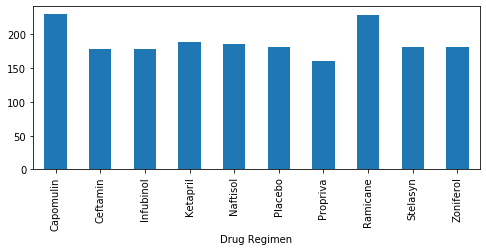

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
multi_plot = count_stat.plot(kind="bar", figsize=(8,3))

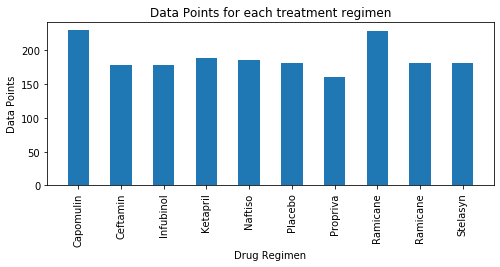

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regm=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftiso","Placebo","Propriva","Ramicane","Ramicane","Stelasyn","Zoniferol"]
positions=[0,1,2,3,4,5,6,7,8,9]
fig = plt.figure(figsize=(8,3))
plt.bar(positions, summary_stat["Count"],width=0.5)
plt.xticks(positions,regm,rotation='vertical')
plt.title("Data Points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()

## Pie plots

In [6]:
gender_grp = merge_table.groupby(['Sex'])
gender_grp

In [7]:
gender_stat = gender_grp["Mouse ID"].describe()
gender_stat

,count,unique,top,freq
Sex,,,,
Female,935,124,g989,13
Male,958,125,j365,10


In [8]:
mouse_count = gender_grp["Mouse ID"].value_counts()
mouse_count

Sex     Mouse ID
Female  g989        13
        a203        10
        a251        10
        a262        10
        a275        10
                    ..
Male    b447         1
        d133         1
        f932         1
        l872         1
        x226         1
Name: Mouse ID, Length: 249, dtype: int64

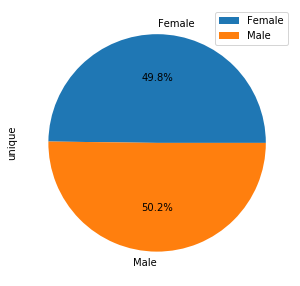

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plot = gender_stat.plot.pie(y='unique', figsize=(5,5),autopct='%1.1f%%') 

Text(0, 0.5, 'Unique')

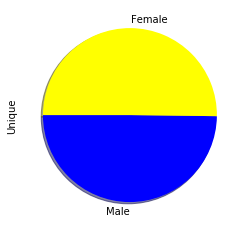

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue", "yellow"]
labels = ["Male", "Female"]

plt.pie( gender_stat['unique'],labels=labels, shadow=True, colors=colors, explode=(0,0), startangle=180)
plt.ylabel("Unique")

## Quartiles, outliers and boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.

In [12]:
capomulin_df=merge_table.loc[merge_table['Drug Regimen']=="Capomulin"]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [13]:
timecount_capo = capomulin_df.sort_values(by=['Timepoint'])

In [14]:
grp_mouse_capo = timecount_capo.groupby(['Mouse ID'])

In [15]:
lastval_capo = grp_mouse_capo.last()
lastval_capo = lastval_capo.sort_values(by=['Tumor Volume (mm3)'])

In [16]:
tumvol_capo = lastval_capo['Tumor Volume (mm3)']
quartiles_capo = tumvol_capo.quantile([.25,.5,.75])
lowerq_capo = quartiles_capo[0.25]
upperq_capo = quartiles_capo[0.75]
iqr_capo = upperq_capo-lowerq_capo

In [17]:
capo_tumVol_List = []
for row in tumvol_capo:
    capo_tumVol_List.append(row)

In [18]:
ramicane_df=merge_table.loc[merge_table['Drug Regimen']=="Ramicane"]
timecount_ram = ramicane_df.sort_values(by=['Timepoint'])
lastval_ram = timecount_ram.groupby(['Mouse ID']).last()
lastval_ram = lastval_ram.sort_values(by=['Tumor Volume (mm3)'])
tumvol_ram = lastval_ram['Tumor Volume (mm3)']
quartiles_ram = tumvol_ram.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram

In [19]:
ram_tumVol_List = []
for row in tumvol_ram:
    ram_tumVol_List.append(row)

In [20]:
infubinol_df=merge_table.loc[merge_table['Drug Regimen']=="Infubinol"]
timecount_inf = infubinol_df.sort_values(by=['Timepoint'])
lastval_inf = timecount_inf.groupby(['Mouse ID']).last()
lastval_inf = lastval_inf.sort_values(by=['Tumor Volume (mm3)'])
tumvol_inf = lastval_inf['Tumor Volume (mm3)']
quartiles_inf = tumvol_inf.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf

In [21]:
inf_tumVol_List = []
for row in tumvol_inf:
    inf_tumVol_List.append(row)

In [22]:
ceftamin_df=merge_table.loc[merge_table['Drug Regimen']=="Ceftamin"]
timecount_cef = ceftamin_df.sort_values(by=['Timepoint'])
lastval_cef = timecount_cef.groupby(['Mouse ID']).last()
lastval_cef = lastval_cef.sort_values(by=['Tumor Volume (mm3)'])
tumvol_cef = lastval_cef['Tumor Volume (mm3)']
quartiles_cef = tumvol_cef.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef

In [23]:
cef_tumVol_List = []
for row in tumvol_cef:
    cef_tumVol_List.append(row)

In [24]:
promising_reg = [capo_tumVol_List,ram_tumVol_List,inf_tumVol_List,cef_tumVol_List]

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

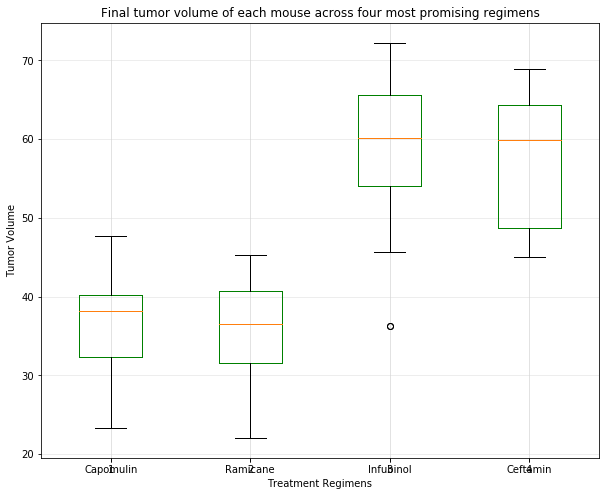

In [26]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_title('Final tumor volume of each mouse across four most promising regimens')
ax1.boxplot(promising_reg)
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel("Treatment Regimens")
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax1.xaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax1.set_axisbelow(True)

bp = plt.boxplot(promising_reg, notch=0, vert=1, whis=1.5)
plt.setp(bp['boxes'], color="green")
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='blue', marker= 'o')

plt.show()

## Line and scatter plots

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Text(0, 0.5, 'Tumor Volume of Mouse s185')

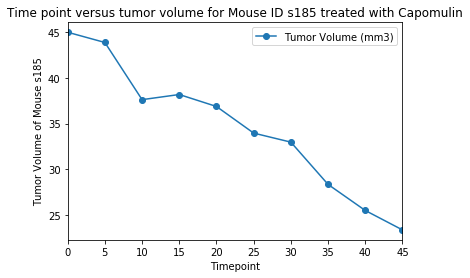

In [28]:
capomulin_df_s185=capomulin_df.loc[capomulin_df['Mouse ID']=="s185"]
capomulin_df_s185 = DataFrame(capomulin_df_s185, columns=['Timepoint','Tumor Volume (mm3)'])
capomulin_df_s185.plot(x='Timepoint',y='Tumor Volume (mm3)',marker = 'o')
plt.legend(loc="upper right")
plt.title("Time point versus tumor volume for Mouse ID s185 treated with Capomulin")
plt.ylabel("Tumor Volume of Mouse s185")

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Text(0, 0.5, 'Average Tumor Volume (mm3)')

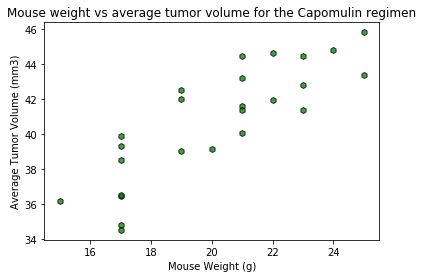

In [30]:
capo_mouse=capomulin_df.groupby("Mouse ID")
weight_grp=capo_mouse['Weight (g)'].mean()
tumor_avg = capo_mouse['Tumor Volume (mm3)'].mean()
weight_list=[]
for row in weight_grp:
    weight_list.append(row)
tumor_mean=[]
for row in tumor_avg:
    tumor_mean.append(row)
fig5,ax5=plt.subplots()
plt.scatter(weight_list, tumor_mean, marker="h", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Mouse weight vs average tumor volume for the Capomulin regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

In [31]:
# Generate a scatter plot of mouse weight versus tumor volume for the Capomulin regimen - not averaged

In [32]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [33]:
correlation = st.pearsonr(weight_list,tumor_mean)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin rerimen is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume for the Capomulin rerimen is 0.84


The r-squared is: 0.8419363424694718


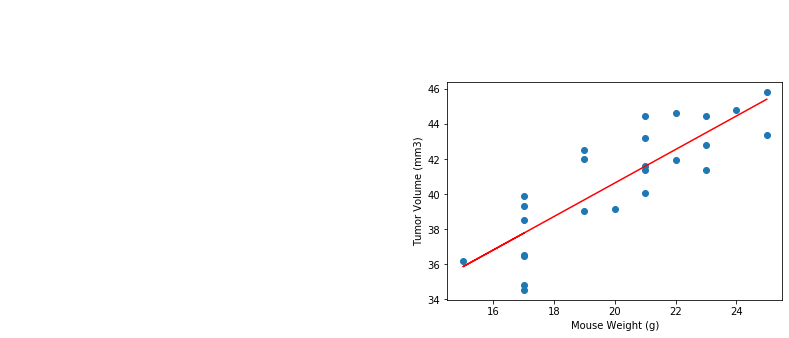

In [39]:
x_values=weight_list
y_values=tumor_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_list,tumor_mean)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_list,tumor_mean)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
plt.show()



(0, 50)

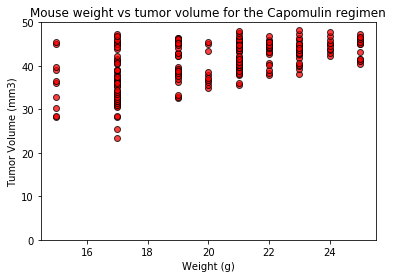

In [36]:
mouse_weight=DataFrame(capomulin_df,columns=['Weight (g)','Tumor Volume (mm3)'])     
x=mouse_weight['Weight (g)']
y=mouse_weight['Tumor Volume (mm3)']
plt.scatter(x=x,y=y,facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight vs tumor volume for the Capomulin regimen")
plt.xlim=(0,50)
plt.ylim(0,50)

In [37]:
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and not averaged tumor volume for the Capomulin rerimen is {round(correlation[0],2)}")

The correlation between mouse weight and not averaged tumor volume for the Capomulin rerimen is 0.53


The r-squared is: 0.5256995552077172


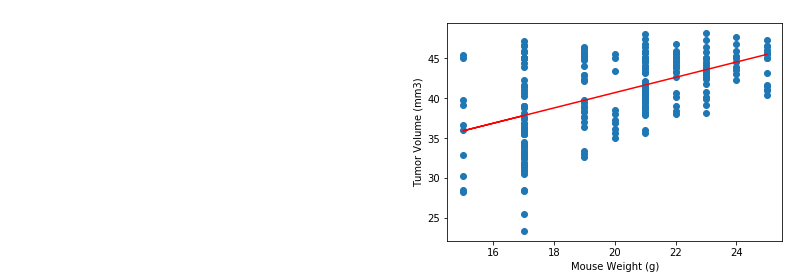

In [38]:
x_values=mouse_weight['Weight (g)']
y_values=mouse_weight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
plt.show()